# Data 608 Story 4


I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.

For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

# Justification
As we explore into data compensation, our emphasis on mid and senior-level positions remains crucial, including those of data scientists around the world. These roles bring extensive experience and expertise, shaping strategies and driving innovation within organizations, reflecting their value through compensation.

Functioning as the backbone of data infrastructure, these professionals design architectures, develop algorithms, and significantly impact business outcomes globally. Analyzing their compensation trends provides insights into market dynamics, industry standards, and skill demands on a worldwide scale.

By focusing on mid and senior-level roles, we gain understanding into factors affecting salary discrepancies like location and specialization, crucial for stakeholders—job seekers, employers, and policymakers—to make informed decisions.

Our analysis on salary discrepancies offers insights into compensation structures, considering factors like job title, experience, education, and location, guiding individuals and organizations globally in navigating the data career landscape effectively.








## Loading libraries and dataset

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
filename = 'data salaries.csv'
df = pd.read_csv(filename)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Columns description

In [79]:
# Print the names of the columns
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


Data Science Job Salaries Dataset contains 11 columns, each are:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year

employment_type: The type of employment for the role

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD

employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely

company_location: The country of the employer's main office or contracting branch

company_size: The median number of people that worked for the company during the year

## Mapping country codes to Continents

In [80]:
# Defining the dictionary mapping country codes to continents
code_to_continent = {
    'ES': 'Europe',
    'US': 'North America',
    'CA': 'North America',
    'DE': 'Europe',
    'GB': 'Europe',
    'NG': 'Africa',
    'IN': 'Asia',
    'HK': 'Asia',
    'NL': 'Europe',
    'CH': 'Europe', 'CF': 'Africa',
    'FR': 'Europe',
    'FI': 'Europe',
    'UA': 'Europe',
    'IE': 'Europe',
    'IL': 'Asia',
    'GH': 'Africa',
    'CO': 'South America',
    'SG': 'Asia',
    'AU': 'Oceania',
    'SE': 'Europe',
    'SI': 'Europe',
    'MX': 'North America',
    'BR': 'South America',
    'PT': 'Europe',
    'RU': 'Europe/Asia', 'HR': 'Europe',
    'VN': 'Asia',
    'EE': 'Europe',
    'AM': 'Asia',
    'BA': 'Europe',
    'KE': 'Africa',
    'GR': 'Europe',
    'MK': 'Europe',
    'LV': 'Europe',
    'RO': 'Europe',
    'PK': 'Asia',
    'IT': 'Europe',
    'MA': 'Africa',
    'PL': 'Europe','AL': 'Europe',
    'AR': 'South America',
    'LT': 'Europe',
    'AS': 'Oceania',
    'CR': 'North America',
    'IR': 'Asia',
    'BS': 'North America',
    'HU': 'Europe',
    'AT': 'Europe',
    'SK': 'Europe',
    'CZ': 'Europe',
    'TR': 'Asia',
    'PR': 'North America',
    'DK': 'Europe',
    'BO': 'South America',
    'PH': 'Asia','BE': 'Europe',
    'ID': 'Asia',
    'EG': 'Africa',
    'AE': 'Asia',
    'LU': 'Europe',
    'MY': 'Asia',
    'HN': 'North America',
    'JP': 'Asia',
    'DZ': 'Africa',
    'IQ': 'Asia',
    'CN': 'Asia',
    'NZ': 'Oceania',
    'CL': 'South America',
    'MD': 'Europe',
    'MT': 'Europe'
}

In [81]:
# Defining the dictionary mapping country codes to continents
code_to_continent = {
    'ES': 'Europe',
    'US': 'North America',
    'CA': 'North America',
    'DE': 'Europe',
    'GB': 'Europe',
    'NG': 'Africa',
    'IN': 'Asia',
    'HK': 'Asia',
    'NL': 'Europe',
    'CH': 'Europe',
    'CF': 'Africa',
    'FR': 'Europe',
    'FI': 'Europe',
    'UA': 'Europe',
    'IE': 'Europe',
    'IL': 'Asia',
    'GH': 'Africa',
    'CO': 'South America',
    'SG': 'Asia',
    'AU': 'Oceania',
    'SE': 'Europe',
    'SI': 'Europe',
    'MX': 'North America',
    'BR': 'South America',
    'PT': 'Europe',
    'RU': 'Europe/Asia',
    'HR': 'Europe',
    'VN': 'Asia',
    'EE': 'Europe',
    'AM': 'Asia',
    'BA': 'Europe',
    'KE': 'Africa',
    'GR': 'Europe',
    'MK': 'Europe',
    'LV': 'Europe',
    'RO': 'Europe',
    'PK': 'Asia',
    'IT': 'Europe',
    'MA': 'Africa',
    'PL': 'Europe',
    'AL': 'Europe',
    'AR': 'South America',
    'LT': 'Europe',
    'AS': 'Oceania',
    'CR': 'North America',
    'IR': 'Asia',
    'BS': 'North America',
    'HU': 'Europe',
    'AT': 'Europe',
    'SK': 'Europe',
    'CZ': 'Europe',
    'TR': 'Asia',
    'PR': 'North America',
    'DK': 'Europe',
    'BO': 'South America',
    'PH': 'Asia',
    'BE': 'Europe',
    'ID': 'Asia',
    'EG': 'Africa',
    'AE': 'Asia',
    'LU': 'Europe',
    'MY': 'Asia',
    'HN': 'North America',
    'JP': 'Asia',
    'DZ': 'Africa',
    'IQ': 'Asia',
    'CN': 'Asia',
    'NZ': 'Oceania',
    'CL': 'South America',
    'MD': 'Europe',
    'MT': 'Europe'
}


In [82]:
# Defining the list of country codes
country_codes = ['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF', 'FR', 'FI', 'UA',
 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX', 'BR', 'PT', 'RU', 'TH', 'HR',
 'VN', 'EE', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL',
 'AR', 'LT', 'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK', 'BO',
 'PH', 'BE', 'ID']

unique_continents = set(code_to_continent.values())
print(unique_continents)

{'Oceania', 'South America', 'North America', 'Europe', 'Asia', 'Africa', 'Europe/Asia'}


In [66]:
# Checking unique values in the column containing continent names
print(df['employee_residence'].unique())

# Checking for missing values or NaNs in the column containing continent names
print(df['employee_residence'].isnull().sum())

# Checking if the continent names in the code_to_continent dictionary are correct
print(code_to_continent.values())

# Checking the range of values in the column containing salary data
print(df['salary_in_usd'].min())
print(df['salary_in_usd'].max())

# Checking the count of unique values in the column containing continent names
print(df['employee_residence'].value_counts())



['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
0
dict_values(['Europe', 'North America', 'North America', 'Europe', 'Europe', 'Africa', 'Asia', 'Asia', 'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Africa', 'South America', 'Asia', 'Oceania', 'Europe', 'Europe', 'North America', 'South America', 'Europe', 'Europe/Asia', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Africa', 'Europe', 'Europe', 'South America', 'Europe', 'Oceania', 'North America', 'Asia', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'North America', 'Europ

In [83]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [84]:
# Defining the dictionary mapping country codes to continents
code_to_continent = {
    'ES': 'Europe', 'US': 'North America', 'CA': 'North America', 'DE': 'Europe', 'GB': 'Europe',
    'NG': 'Africa', 'IN': 'Asia', 'HK': 'Asia', 'NL': 'Europe', 'CH': 'Europe', 'CF': 'Africa',
    'FR': 'Europe', 'FI': 'Europe', 'UA': 'Europe', 'IE': 'Europe', 'IL': 'Asia', 'GH': 'Africa',
    'CO': 'South America', 'SG': 'Asia', 'AU': 'Oceania', 'SE': 'Europe', 'SI': 'Europe', 'MX': 'North America',
    'BR': 'South America', 'PT': 'Europe', 'RU': 'Europe/Asia', 'HR': 'Europe', 'VN': 'Asia', 'EE': 'Europe',
    'AM': 'Asia', 'BA': 'Europe', 'KE': 'Africa', 'GR': 'Europe', 'MK': 'Europe', 'LV': 'Europe', 'RO': 'Europe',
    'PK': 'Asia', 'IT': 'Europe', 'MA': 'Africa', 'PL': 'Europe', 'AL': 'Europe', 'AR': 'South America',
    'LT': 'Europe', 'AS': 'Oceania', 'CR': 'North America', 'IR': 'Asia', 'BS': 'North America', 'HU': 'Europe',
    'AT': 'Europe', 'SK': 'Europe', 'CZ': 'Europe', 'TR': 'Asia', 'PR': 'North America', 'DK': 'Europe',
    'BO': 'South America', 'PH': 'Asia', 'BE': 'Europe', 'ID': 'Asia', 'EG': 'Africa', 'AE': 'Asia',
    'LU': 'Europe', 'MY': 'Asia', 'HN': 'North America', 'JP': 'Asia', 'DZ': 'Africa', 'IQ': 'Asia', 'CN': 'Asia',
    'NZ': 'Oceania', 'CL': 'South America', 'MD': 'Europe', 'MT': 'Europe'
}

# Add continent column to the DataFrame based on the country codes
df['continent'] = df['employee_residence'].map(code_to_continent)

# Check the updated DataFrame
print(df.head())


   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size      continent  
0               ES            L      

In [85]:
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'continent'],
      dtype='object')


## Data by Continent, experience level and average salary

In [89]:
# Group the data by continent and experience_level, and calculate the average salary
grouped_df = df.groupby(['continent', 'experience_level'])['salary'].mean().reset_index()

# Pivot the data to have continents as rows, experience levels as columns, and average salary as values
pivot_df = grouped_df.pivot(index='continent', columns='experience_level', values='salary')

# Printing the pivot table
print(pivot_df)


experience_level             EN          EX            MI            SE
continent                                                              
Africa             38038.857143    15000.00  4.570000e+04  8.250000e+04
Asia              727530.100000  3075000.00  1.290376e+06  2.178050e+06
Europe            154576.571429   100723.75  1.634056e+05  7.848427e+04
Europe/Asia                 NaN   157500.00  4.800000e+04  6.000000e+04
North America     103770.313187   207436.61  1.282562e+05  1.591025e+05
Oceania            77200.000000         NaN  8.809250e+04  1.393333e+05
South America      41794.400000         NaN  2.227507e+06  8.133333e+04


## Visualization: Average salary by Continent

<ipython-input-93-5d1e4645e2de>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




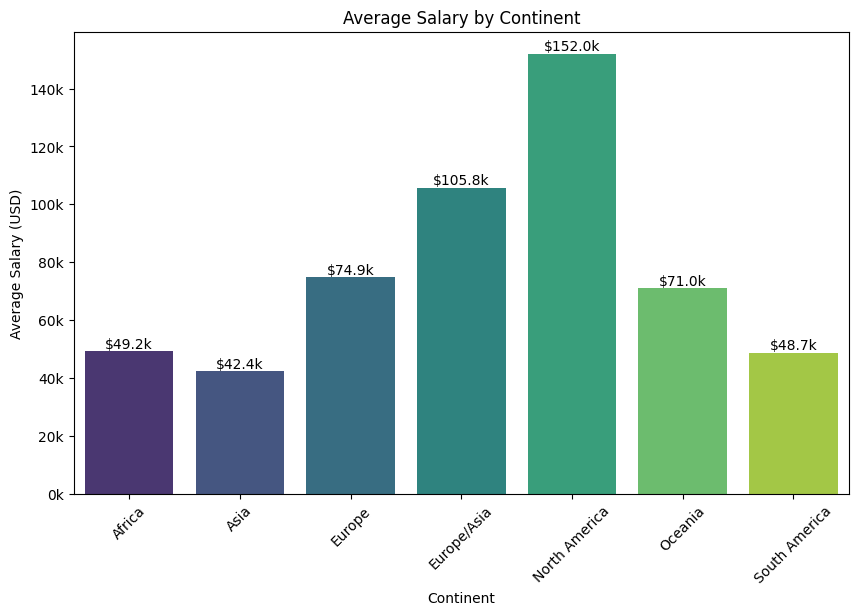

In [93]:
import matplotlib.ticker as ticker

# Calculating the average salary by continent
average_salary_by_continent = df[df['employee_residence'].isin(country_codes)].groupby(df['employee_residence'].map(code_to_continent))['salary_in_usd'].mean().round()

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating the bar plot using seaborn palette
sns.barplot(x=average_salary_by_continent.index, y=average_salary_by_continent.values, palette='viridis')

# Adding value labels to the bars with "k" notation for thousands
for i, value in enumerate(average_salary_by_continent.values):
    formatted_value = f'${value/1000:.1f}k'
    plt.text(i, value, formatted_value, ha='center', va='bottom')

# Setting plot title and labels
plt.title('Average Salary by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Salary (USD)')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Formatting y-axis ticks with "k" notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}k'))

# Showing the plot
plt.show()

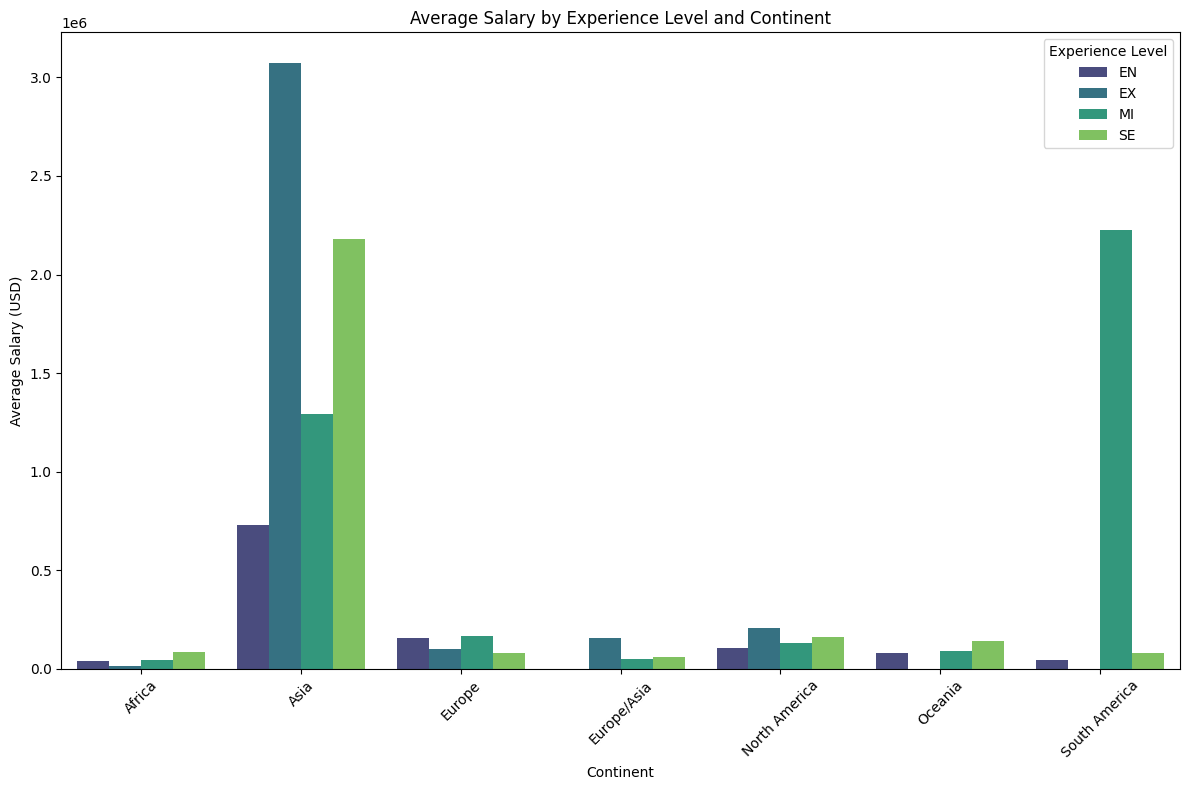

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by continent and experience_level, and calculate the average salary
grouped_df = df.groupby(['continent', 'experience_level'])['salary'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=grouped_df, x='continent', y='salary', hue='experience_level', palette='viridis')

# Add a title and labels
plt.title('Average Salary by Experience Level and Continent')
plt.xlabel('Continent')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Experience Level')

# Show the plot
plt.tight_layout()
plt.show()



## Visualization: Salary by Experience and Continent

In [92]:
import pandas as pd
import plotly.express as px

# Group the data by continent and a sub-group (e.g., 'employment_type')
subgroup_average = df.groupby(['continent', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Calculate the average salary per continent
average_salary_per_continent = subgroup_average.groupby('continent')['salary_in_usd'].mean().reset_index(name='average_salary')

print(average_salary_per_continent)





       continent  average_salary
0         Africa    65745.000000
1           Asia    51385.375000
2         Europe    48257.720100
3    Europe/Asia    90500.000000
4  North America   105834.905027
5        Oceania    61346.192308
6  South America    24097.526882


## Visualization: Average Salary by Continent

In [74]:
import plotly.express as px

# Data
data = {
    'Continent': ['Africa', 'Asia', 'Europe', 'North America'],
    'Average Salary (USD)': [58750.000000, 33292.507143, 58203.340984, 108677.844968],
    'Latitude': [6.1750, 34.0479, 51.1657, 37.7749],  # Sample latitude coordinates for each continent
    'Longitude': [1.2340, 100.6197, 10.4515, -122.4194]  # Sample longitude coordinates for each continent
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a scatter map using Plotly Express
fig = px.scatter_geo(df,
                     lat='Latitude',  # Latitude coordinates
                     lon='Longitude',  # Longitude coordinates
                     hover_name='Continent',  # Hover text
                     size='Average Salary (USD)',  # Size of the point based on average salary
                     color='Average Salary (USD)',  # Color of the point based on average salary
                     projection='natural earth',  # Choose projection type
                     labels={'Average Salary (USD)': 'Average Salary (USD)'}  # Label for legend
                    )

# Update layout settings
fig.update_layout(
    title='Average Salary by Continent',
    geo=dict(
        showcoastlines=True,  # Show coastlines on the map
    )
)

# Show th




## Conclusion:


In conclusion, the analysis reveals significant variations in average salaries across different continents and experience levels within the data field.

Across Africa, Europe, North America, Oceania, and South America, mid and senior-level positions generally command higher average salaries compared to entry-level and experienced roles. Notably, Asia stands out with exceptionally high average salaries for mid and senior-level positions, indicating strong demand and lucrative opportunities for experienced data professionals in the region.

These findings underscore the importance of considering regional dynamics and experience levels when assessing compensation within the data industry. Such insights are invaluable for professionals seeking career advancement, organizations recruiting top talent, and policymakers shaping policies to support the growth of the data sector worldwide.

## References:


Dataset from kaggle and linkedin
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023